In [ ]:
!pip install nltk

# **SUBE EL ARCHIVO PRIMERO**

In [ ]:
import pkg_resources
import re
import nltk

import pandas                               as pd
import matplotlib.pyplot                    as plt

from nltk.corpus                            import stopwords
from nltk.tokenize                          import word_tokenize
from wordcloud                              import WordCloud




<ipython-input-2-423c5d5ba7cb>:1: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  import pkg_resources


In [ ]:
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("nltk version:", nltk.__version__)
print("wordcloud version:", WordCloud.__module__.split('.')[0])

# Algunos paquetes no exponen __version__, así que para wordcloud:
import wordcloud
print("wordcloud version:", wordcloud.__version__)


pandas version: 2.2.2
matplotlib version: 3.10.0
nltk version: 3.9.1
wordcloud version: wordcloud
wordcloud version: 1.9.4


In [ ]:
nltk.download('stopwords') # Download stopwords data
nltk.download('punkt') # Download punkt data
nltk.download('punkt_tab') # Download punkt tab data
nltk.download('averaged_perceptron_tagger') # Download averaged perceptron tagger data


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
# --- Definir Stopwords ---
stop_words_english = set(stopwords.words('english'))
# Stopwords personalizadas para títulos (puedes ajustar esta lista)
custom_stopwords_title = {
    'based', 'using', 'model', 'prediction', 'wildfire', 'forest', 'fire',
    'learning', 'machine', 'approach', 'method', 'data', 'system', 'analysis',
    'study', 'case', 'using', 'evaluation', 'assessment', 'risk', 'predicting',
    'prediction', 'detection', 'mapping', 'review', 'comparison', 'survey',
    'paper', 'algorithms', 'methods', 'models', 'techniques', 'algorithm',
    'predict', 'spread', 'occurrence', 'forecasting', 'remote', 'sensing',
    'satellite', 'area', 'susceptibility', 'management', 'application', 'using'
}
all_stopwords_title = stop_words_english.union(custom_stopwords_title)


In [ ]:
# --- Función para Preprocesar Texto ---
def preprocess_text(text_series, custom_stopwords_set):
    # Manejar valores NaN
    text_series = text_series.fillna('')
    # Combinar texto
    full_text = ' '.join(text_series)
    # Minúsculas
    full_text = full_text.lower()
    # Eliminar puntuación y números
    full_text = re.sub(r'[^\w\s]', '', full_text)
    full_text = re.sub(r'\d+', '', full_text)
    # Tokenizar
    words = word_tokenize(full_text)
    # Eliminar stopwords y palabras cortas
    processed_words = [word for word in words if word not in custom_stopwords_set and len(word) > 2]
    return ' '.join(processed_words)


In [ ]:
# --- Cargar Datos desde el Archivo CSV ---
file_path = 'scopus_1.csv' # Nombre del archivo CSV
try:
    # Intenta leer el CSV, especificando la codificación si es necesario (utf-8 es común)
    # Si da error de codificación, prueba con 'latin-1' o 'cp1252'
    df = pd.read_csv(file_path, encoding='utf-8')
    print(f"Archivo '{file_path}' cargado exitosamente.")
    # Muestra las primeras filas y los nombres de las columnas para verificar
    # print("Primeras filas del DataFrame:")
    # print(df.head())
    # print("\nNombres de las columnas:")
    # print(df.columns)
except FileNotFoundError:
    print(f"Error: El archivo '{file_path}' no se encontró.")
    print("Asegúrate de que el archivo CSV esté en el mismo directorio que este script o proporciona la ruta completa.")
    exit() # Salir si el archivo no se encuentra
except UnicodeDecodeError:
    print(f"Error de codificación al leer '{file_path}'. Intentando con 'latin-1'.")
    try:
        df = pd.read_csv(file_path, encoding='latin-1')
        print(f"Archivo '{file_path}' cargado exitosamente con 'latin-1'.")
    except Exception as e:
        print(f"Error al leer el archivo CSV con 'latin-1': {e}")
        exit()
except Exception as e:
    print(f"Error inesperado al leer el archivo CSV: {e}")
    exit()

Archivo 'scopus_1.csv' cargado exitosamente.


In [ ]:
# Verificar que las columnas 'Title' y 'Author Keywords' existan
required_columns = ['Title', 'Author Keywords']
missing_columns = [col for col in required_columns if col not in df.columns]
if missing_columns:
    print(f"Error: Las siguientes columnas requeridas no se encontraron en el CSV: {missing_columns}")
    print(f"Columnas encontradas: {list(df.columns)}")
    exit()



In [ ]:
# --- Procesar la columna 'Title' ---
print("Procesando títulos...")
title_text = preprocess_text(df['Title'], all_stopwords_title)

Procesando títulos...


In [ ]:
# --- Procesar la columna 'Author Keywords' ---
print("Procesando Author Keywords...")
# Separar keywords que usan ';' y luego preprocesar
# Usar dropna() antes de split para evitar errores con NaN
keywords_series = df['Author Keywords'].dropna().astype(str)
keywords_list = keywords_series.str.split(';').sum() # Suma listas para concatenarlas
keywords_text_individual = ' '.join(keywords_list) # Une todas las keywords en un string
keywords_text = preprocess_text(pd.Series([keywords_text_individual]), stop_words_english) # Preprocesa el string

Procesando Author Keywords...


Generando word cloud para Títulos...


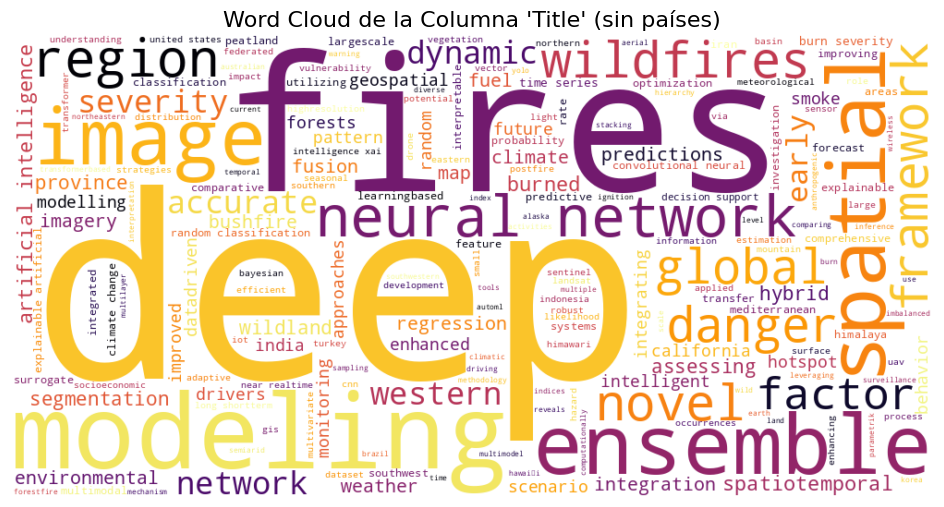

In [ ]:
# prompt: puedes hacer el worldcloud pero que quitarle los paises para que no aparezcan?# --- Generar y mostrar Word Cloud para 'Title' ---
# if title_text:
#     print("Generando word cloud para Títulos...")
#     wordcloud_title = WordCloud(width=1000, height=500, background_color='white', collocations=True).generate(title_text)
#     plt.figure(figsize=(12, 6))
#     plt.imshow(wordcloud_title, interpolation='bilinear')
#     plt.axis("off")
#     plt.title("Word Cloud de la Columna 'Title'", fontsize=16)
#     plt.show()
# else:
#     print("No se encontraron palabras válidas en los títulos para generar la nube de palabras.")

import matplotlib.pyplot as plt
# --- Generar y mostrar Word Cloud para 'Title' ---
if title_text:
    print("Generando word cloud para Títulos...")
    # Lista de países a excluir (puedes expandirla)
    countries_to_exclude = ["USA", "United States", "china", "India", "Brazil", "Australia", "Canada", "Mexico", "UK", "United Kingdom", "Germany", "France", "Japan", "Russia", "Italy", "Spain", "South Korea", "South Africa", "Nigeria", "Argentina",  # Agrega más países según sea necesario
                            "United States of America", "U.S.", "U.K.", "EU", "European Union", "Africa", "Asia", "Europe", "America", "South America", "North America"]  # Agrega más países o regiones

    # Crea una lista de palabras excluyendo los países
    words = title_text.split()
    filtered_words = [word for word in words if word not in countries_to_exclude]
    filtered_text = " ".join(filtered_words)

    wordcloud_title = WordCloud(width=1000, height=500, background_color='white', collocations=True, colormap="inferno_r").generate(filtered_text)
    plt.figure(figsize=(12, 6))
    plt.imshow(wordcloud_title, interpolation='bilinear')
    plt.axis("off")
    plt.title("Word Cloud de la Columna 'Title' (sin países)", fontsize=16)
    plt.show()
else:
    print("No se encontraron palabras válidas en los títulos para generar la nube de palabras.")


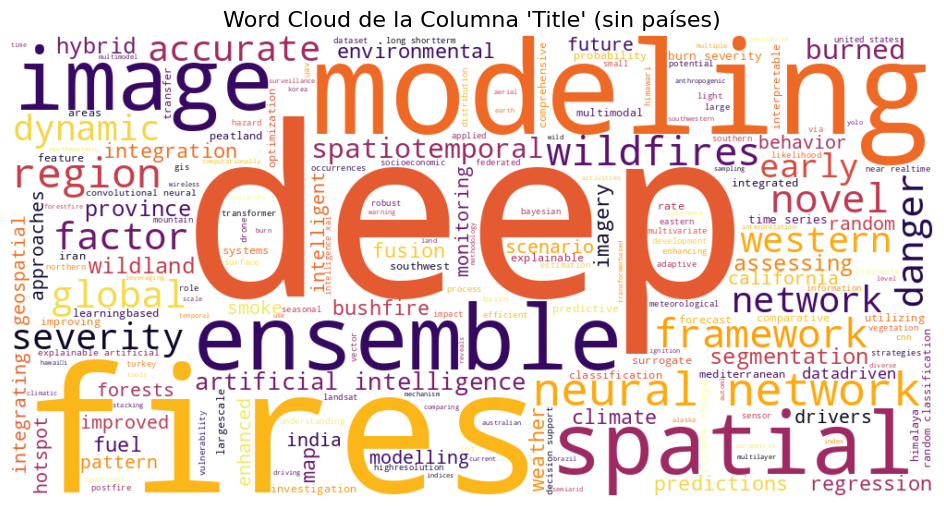

In [ ]:
# prompt:  prompt: puedes hacer el worldcloud pero que quitarle los paises para que no aparezcan?, ya sea que tengan la primera letra en upper case o lower case# --- Generar y mostrar Word Cloud para 'Title' ---
# # if title_text:
# #     print("Generando word cloud para Títulos...")
# #     wordcloud_title = WordCloud(width=1000, height=500, background_color='white', collocations=True).generate(title_text)
# #     plt.figure(figsize=(12, 6))
# #     plt.imshow(wordcloud_title, interpolation='bilinear')
# #     plt.axis("off")
# #     plt.title("Word Cloud de la Columna 'Title'", fontsize=16)
# #     plt.show()
# # else:
# #     print("No se encontraron palabras válidas en los títulos para generar la nube de palabras.")


# Lista de países a excluir (puedes expandirla)
countries_to_exclude = ["USA", "United States", "china", "India", "Brazil", "Australia", "Canada", "Mexico", "UK", "United Kingdom", "Germany", "France", "Japan", "Russia", "Italy", "Spain", "South Korea", "South Africa", "Nigeria", "Argentina",  # Agrega más países según sea necesario
                            "United States of America", "U.S.", "U.K.", "EU", "European Union", "Africa", "Asia", "Europe", "America", "South America", "North America"]  # Agrega más países o regiones


# The lines below were indented by one level, causing the IndentationError.
# They should be aligned with the import statement above.
words = title_text.split()
filtered_words = [word for word in words if word not in countries_to_exclude]
filtered_text = " ".join(filtered_words)

wordcloud_title = WordCloud(width=1000, height=500, background_color='white', collocations=True, colormap="inferno_r").generate(filtered_text)
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud_title, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud de la Columna 'Title' (sin países)", fontsize=16)
plt.show()

Generando word cloud para Títulos...


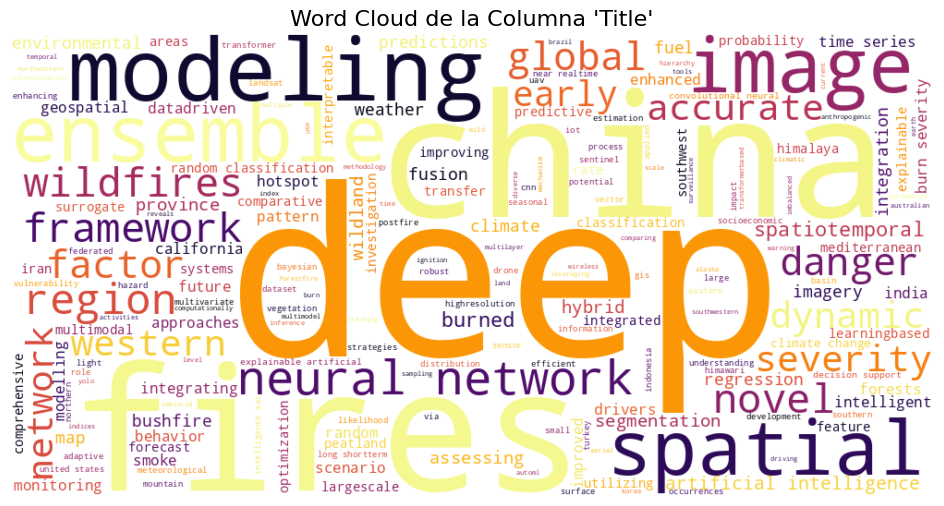

In [ ]:
# --- Generar y mostrar Word Cloud para 'Title' ---
if title_text:
    print("Generando word cloud para Títulos...")
    wordcloud_title = WordCloud(width=1000, height=500, background_color='white', collocations=True, colormap="inferno_r").generate(title_text)
    plt.figure(figsize=(12, 6))
    plt.imshow(wordcloud_title, interpolation='bilinear')
    plt.axis("off")
    plt.title("Word Cloud de la Columna 'Title'", fontsize=16)
    plt.show()
else:
    print("No se encontraron palabras válidas en los títulos para generar la nube de palabras.")


Generando word cloud para Author Keywords...


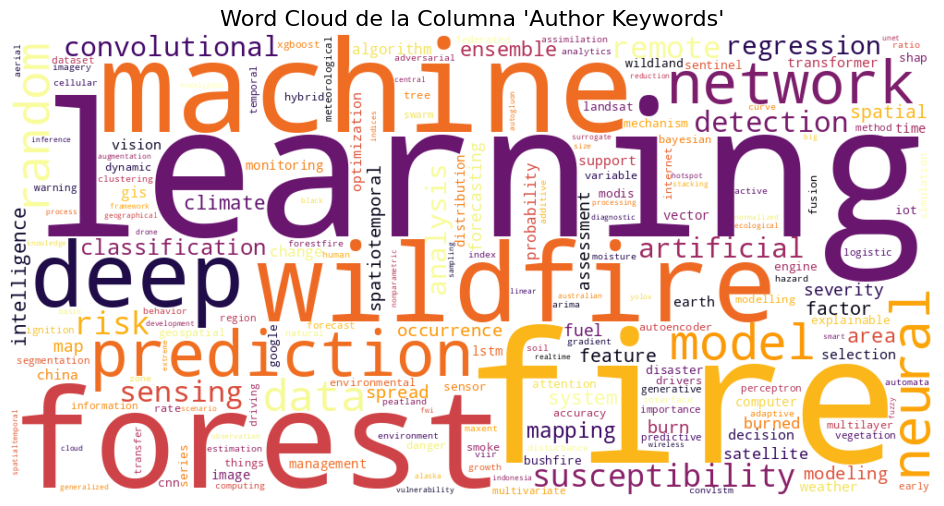

Proceso completado.


In [ ]:
# --- Generar y mostrar Word Cloud para 'Author Keywords' ---
if keywords_text:
    print("Generando word cloud para Author Keywords...")
    wordcloud_keywords = WordCloud(width=1000, height=500, background_color='white', collocations=False, colormap="inferno_r").generate(keywords_text)
    plt.figure(figsize=(12, 6))
    plt.imshow(wordcloud_keywords, interpolation='bilinear')
    plt.axis("off")
    plt.title("Word Cloud de la Columna 'Author Keywords'", fontsize=16)
    plt.show()
else:
    print("No se encontraron palabras válidas en las Author Keywords para generar la nube de palabras.")

print("Proceso completado.")





Generando word cloud para el texto combinado...


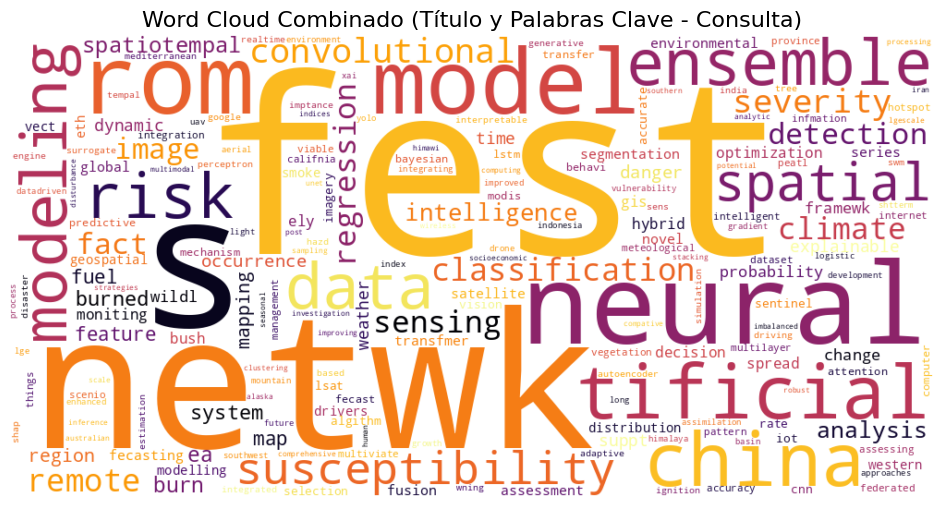

In [ ]:
# prompt: puedes hacer un world cloud donde sumes los world clouds de "Title" y "Author Keywords" y le restes la siguiente cadena que fue la que utilice para realizar la busqueda?
# TITLE-ABS-KEY ( ( wildfire OR forest AND fire ) AND ( "Machine learning" OR "Deep learning" ) AND ( prediction OR forecast ) ) AND PUBYEAR > 2023 AND PUBYEAR < 2026 AND ( LIMIT-TO ( DOCTYPE , "ar" ) ) AND ( LIMIT-TO ( LANGUAGE , "English" ) )**

import matplotlib.pyplot as plt
# --- Combinar y restar texto para la nube de palabras ---
search_query = "TITLE-ABS-KEY ( ( wildfire OR forest AND fire ) AND ( \"Machine learning\" OR \"Deep learning\" ) AND ( prediction OR forecast ) ) AND PUBYEAR > 2023 AND PUBYEAR < 2026 AND ( LIMIT-TO ( DOCTYPE , \"ar\" ) ) AND ( LIMIT-TO ( LANGUAGE , \"English\" ) )"
combined_text = title_text + " " + keywords_text
# Eliminar la cadena de búsqueda del texto combinado
combined_text = combined_text.lower()
search_query = search_query.lower()

# Tokenizar la consulta de búsqueda para eliminarla palabra por palabra
search_tokens = word_tokenize(search_query)
# Eliminar signos de puntuación de los tokens
search_tokens = [re.sub(r'[^\w\s]', '', token) for token in search_tokens]
# Eliminar tokens vacíos resultantes de la eliminación de puntuación
search_tokens = [token for token in search_tokens if token]

# Eliminar las palabras de la consulta de la cadena combinada
for token in search_tokens:
    combined_text = combined_text.replace(token, "")

# --- Generar Word Cloud para texto combinado ---
if combined_text:
    print("Generando word cloud para el texto combinado...")
    wordcloud_combined = WordCloud(width=1000, height=500, background_color='white', collocations=False, colormap="inferno_r").generate(combined_text)
    plt.figure(figsize=(12, 6))
    plt.imshow(wordcloud_combined, interpolation='bilinear')
    plt.axis("off")
    plt.title("Word Cloud Combinado (Título y Palabras Clave - Consulta)", fontsize=16)
    plt.show()
else:
    print("No hay suficiente texto para generar la word cloud combinada.")


Archivo 'DBscopus2.csv' cargado exitosamente.
Preprocesando textos para comparación...
Calculando frecuencias...
Calculando diferencia de frecuencias...
Generando word cloud para palabras dominantes en Títulos...


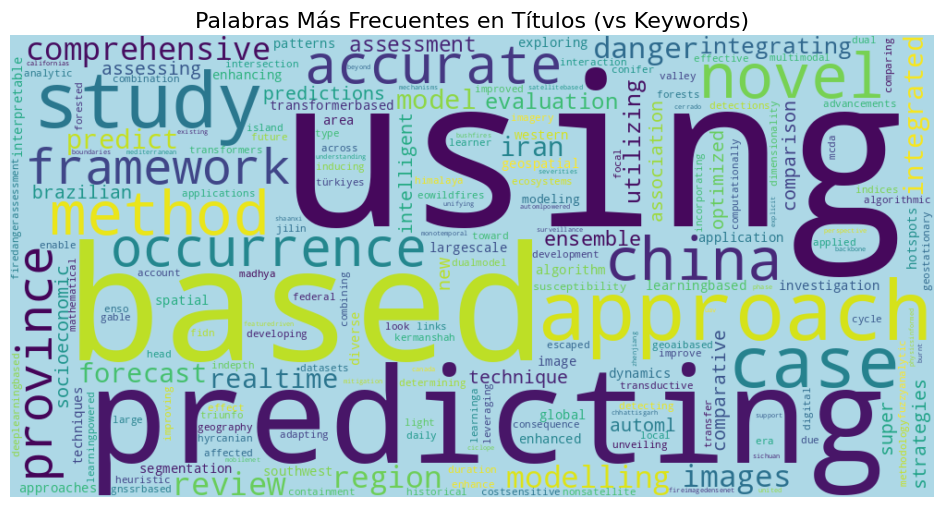

Generando word cloud para palabras dominantes en Keywords...


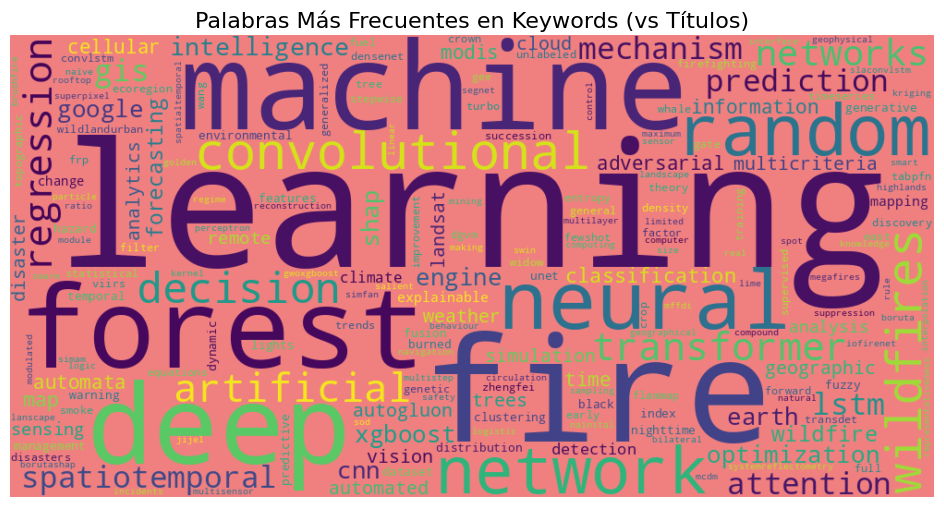


--- Top 15 Palabras Más Frecuentes en Títulos (vs Keywords) ---
         word  freq_diff
        using   0.026851
        based   0.013771
   predicting   0.012205
     approach   0.012144
        study   0.010578
         case   0.008950
        novel   0.006509
       method   0.006448
        china   0.006081
     accurate   0.004882
   occurrence   0.004698
     province   0.004068
    framework   0.004007
comprehensive   0.003255
       review   0.003255

--- Top 15 Palabras Más Frecuentes en Keywords (vs Títulos) ---
         word  freq_diff
     learning  -0.030550
         fire  -0.020541
      machine  -0.013761
       forest  -0.011994
         deep  -0.011601
       neural  -0.011557
       random  -0.009746
      network  -0.008119
convolutional  -0.007874
    wildfires  -0.007122
     decision  -0.005249
   artificial  -0.004558
   regression  -0.004374
  transformer  -0.004374
     networks  -0.003683

Proceso completado.


In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re
from collections import Counter


# --- Definir Stopwords ---
# Usaremos solo stopwords estándar para una comparación más justa
stop_words_english = set(stopwords.words('english'))
# Puedes añadir algunas palabras genéricas si aún dominan demasiado AMBAS nubes
# custom_stopwords_generic = {'using', 'based', 'model', 'prediction', 'wildfire', 'forest', 'fire'}
# all_stopwords_comparison = stop_words_english.union(custom_stopwords_generic)
all_stopwords_comparison = stop_words_english # Empezamos solo con las estándar


# --- Función para Preprocesar Texto y Obtener Lista de Palabras ---
def preprocess_to_wordlist(text_series, custom_stopwords_set):
    text_series = text_series.fillna('')
    full_text = ' '.join(text_series)
    full_text = full_text.lower()
    full_text = re.sub(r'[^\w\s]', '', full_text)
    full_text = re.sub(r'\d+', '', full_text)
    words = word_tokenize(full_text)
    processed_words = [word for word in words if word not in custom_stopwords_set and len(word) > 2]
    return processed_words

# --- Cargar Datos desde el Archivo CSV ---
file_path = 'DBscopus2.csv'
try:
    df = pd.read_csv(file_path, encoding='utf-8')
    print(f"Archivo '{file_path}' cargado exitosamente.")
except FileNotFoundError:
    print(f"Error: El archivo '{file_path}' no se encontró.")
    exit()
except UnicodeDecodeError:
    print(f"Error de codificación al leer '{file_path}'. Intentando con 'latin-1'.")
    try:
        df = pd.read_csv(file_path, encoding='latin-1')
        print(f"Archivo '{file_path}' cargado exitosamente con 'latin-1'.")
    except Exception as e:
        print(f"Error al leer el archivo CSV con 'latin-1': {e}")
        exit()
except Exception as e:
    print(f"Error inesperado al leer el archivo CSV: {e}")
    exit()

required_columns = ['Title', 'Author Keywords']
missing_columns = [col for col in required_columns if col not in df.columns]
if missing_columns:
    print(f"Error: Las siguientes columnas requeridas no se encontraron en el CSV: {missing_columns}")
    exit()

# --- Procesar Columnas para obtener listas de palabras ---
print("Preprocesando textos para comparación...")
title_words = preprocess_to_wordlist(df['Title'], all_stopwords_comparison)

# Procesar keywords (separar por ';')
keywords_series = df['Author Keywords'].dropna().astype(str)
keywords_list = keywords_series.str.split(';').sum()
keywords_text_individual = ' '.join(keywords_list)
# Convertir el string único de keywords en una Serie para la función
keywords_words = preprocess_to_wordlist(pd.Series([keywords_text_individual]), all_stopwords_comparison)

# --- Calcular Frecuencias Relativas ---
print("Calculando frecuencias...")
total_title_words = len(title_words)
total_keywords_words = len(keywords_words)

# Evitar división por cero si no hay palabras
if total_title_words == 0 or total_keywords_words == 0:
    print("Error: No se encontraron suficientes palabras en una o ambas columnas después del preprocesamiento.")
    exit()

title_freq = Counter(title_words)
keywords_freq = Counter(keywords_words)

# Crear DataFrames con frecuencias relativas
df_title_freq = pd.DataFrame(title_freq.items(), columns=['word', 'freq_title'])
df_title_freq['rel_freq_title'] = df_title_freq['freq_title'] / total_title_words

df_keywords_freq = pd.DataFrame(keywords_freq.items(), columns=['word', 'freq_keywords'])
df_keywords_freq['rel_freq_keywords'] = df_keywords_freq['freq_keywords'] / total_keywords_words

# --- Combinar y Calcular Diferencia ---
print("Calculando diferencia de frecuencias...")
df_comparison = pd.merge(df_title_freq[['word', 'rel_freq_title']],
                         df_keywords_freq[['word', 'rel_freq_keywords']],
                         on='word', how='outer')

# Llenar NaNs con 0 (significa que la palabra no apareció en esa fuente)
df_comparison = df_comparison.fillna(0)

# Calcular la diferencia (positivo = más en título, negativo = más en keywords)
df_comparison['freq_diff'] = df_comparison['rel_freq_title'] - df_comparison['rel_freq_keywords']

# --- Seleccionar Palabras con Mayor Diferencia ---
# Palabras más frecuentes en Títulos que en Keywords
df_titles_dominant = df_comparison[df_comparison['freq_diff'] > 0].sort_values(by='freq_diff', ascending=False)
# Convertir la diferencia a un diccionario de frecuencia para la nube (usamos la diferencia como peso)
# Multiplicamos por un factor grande para que los pesos no sean demasiado pequeños para la nube
factor = 10000
title_diff_freq_dict = dict(zip(df_titles_dominant['word'], (df_titles_dominant['freq_diff'] * factor).astype(int)))

# Palabras más frecuentes en Keywords que en Títulos
df_keywords_dominant = df_comparison[df_comparison['freq_diff'] < 0].sort_values(by='freq_diff', ascending=True)
# Usamos el valor absoluto de la diferencia como peso
keyword_diff_freq_dict = dict(zip(df_keywords_dominant['word'], (df_keywords_dominant['freq_diff'].abs() * factor).astype(int)))

# --- Generar y Mostrar Nubes de Palabras de Diferencia ---

# Nube para Títulos Dominantes
if title_diff_freq_dict:
    print("Generando word cloud para palabras dominantes en Títulos...")
    wordcloud_title_diff = WordCloud(width=1000, height=500, background_color='lightblue', collocations=False).generate_from_frequencies(title_diff_freq_dict)
    plt.figure(figsize=(12, 6))
    plt.imshow(wordcloud_title_diff, interpolation='bilinear')
    plt.axis("off")
    plt.title("Palabras Más Frecuentes en Títulos (vs Keywords)", fontsize=16)
    plt.show()
else:
    print("No se encontraron palabras significativamente más frecuentes en los títulos.")

# Nube para Keywords Dominantes
if keyword_diff_freq_dict:
    print("Generando word cloud para palabras dominantes en Keywords...")
    wordcloud_keyword_diff = WordCloud(width=1000, height=500, background_color='lightcoral', collocations=False).generate_from_frequencies(keyword_diff_freq_dict)
    plt.figure(figsize=(12, 6))
    plt.imshow(wordcloud_keyword_diff, interpolation='bilinear')
    plt.axis("off")
    plt.title("Palabras Más Frecuentes en Keywords (vs Títulos)", fontsize=16)
    plt.show()
else:
    print("No se encontraron palabras significativamente más frecuentes en las keywords.")

# (Opcional) Mostrar tabla con las mayores diferencias
print("\n--- Top 15 Palabras Más Frecuentes en Títulos (vs Keywords) ---")
print(df_titles_dominant[['word', 'freq_diff']].head(15).to_string(index=False))

print("\n--- Top 15 Palabras Más Frecuentes en Keywords (vs Títulos) ---")
# Mostramos las que tienen la diferencia más negativa (mayor dominio de keywords)
print(df_keywords_dominant[['word', 'freq_diff']].head(15).to_string(index=False))


print("\nProceso completado.")

------------
-----------

# Analisis de algoritmos vs countries utilizando otra database

In [ ]:
import pandas as pd
import plotly.graph_objects as go




In [ ]:
# Cargar el archivo CSV
file_path = "Tabla de Algoritmos de Deep Learning - Hoja 1.csv"
df = pd.read_csv(file_path, encoding="utf-8")



In [ ]:
# Extraer las columnas necesarias
source_column = "Algoritmo"
target_column = "Pais de estudio"

data = df[[source_column, target_column]].dropna()

In [ ]:
# Crear listas de nodos únicos
nodes = list(set(data[source_column]).union(set(data[target_column])))
node_indices = {node: i for i, node in enumerate(nodes)}

In [ ]:
# Crear listas de enlaces (source, target, value)
source_indices = data[source_column].map(node_indices)
target_indices = data[target_column].map(node_indices)
values = [1] * len(data)  # Se asume peso 1 por cada conexión

In [ ]:
# Crear diagrama Sankey
fig = go.Figure(go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=nodes
    ),
    link=dict(
        source=source_indices,
        target=target_indices,
        value=values
    )
))

fig.update_layout(title_text="Diagrama Sankey: Algoritmo vs País de estudio", font_size=10)
fig.show()

In [ ]:
# prompt: haz un codigo donde esten los top 14 de la columna de "Algoritmo"

# Suponiendo que 'df' es tu DataFrame y la columna se llama "Algoritmo"
top_14_algoritmos = df['Algoritmo'].value_counts().nlargest(14)
top_14_algoritmos


,count
Algoritmo,
RF,28
XGBoost,12
SVM,12
CNN,9
ANN,8
DT,7
Log-Res,5
MLP,4
ConvLSTM,4


In [ ]:
# prompt: haz un sankey diagram con lo anterior vs columna de "País de estudio"

import plotly.graph_objects as go

# Suponiendo que 'df' es tu DataFrame y las columnas se llaman "Algoritmo" y "Pais de estudio"
# Asegúrate de que 'df' esté definido correctamente en tu código anterior

# Extraer las columnas necesarias
source_column = "Algoritmo"
target_column = "Pais de estudio"

data = df[[source_column, target_column]].dropna()

# Filtrar por los 14 algoritmos más comunes
top_14_algoritmos = df['Algoritmo'].value_counts().nlargest(14).index
data_filtered = data[data['Algoritmo'].isin(top_14_algoritmos)]




In [ ]:
# Crear listas de nodos únicos
nodes = list(set(data_filtered[source_column]).union(set(data_filtered[target_column])))
node_indices = {node: i for i, node in enumerate(nodes)}

# Crear listas de enlaces (source, target, value)
source_indices = data_filtered[source_column].map(node_indices)
target_indices = data_filtered[target_column].map(node_indices)
values = [1] * len(data_filtered)  # Se asume peso 1 por cada conexión

# Crear diagrama Sankey
fig = go.Figure(go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=nodes
    ),
    link=dict(
        source=source_indices,
        target=target_indices,
        value=values
    )
))

fig.update_layout(title_text="Diagrama Sankey: Top 14 Algoritmos vs País de estudio", font_size=10)
fig.show()


In [ ]:
# Crear diagrama Sankey con tamaño de letra aumentado
fig = go.Figure(go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=nodes,
        x=[0.1, 0.9], # esto podría mejorar la legibilidad
        y=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9] # intenta esto tambien
    ),
    link=dict(
        source=source_indices,
        target=target_indices,
        value=values,
        label=nodes
    )
))
# aquí es donde ajustas el tamaño de la letra
fig.update_layout(
    title_text="Diagrama Sankey: Top 14 Algoritmos vs País de estudio",
    font_size=16, # tamaño del título
    font_family="Arial", # tipo de letra

)
fig.show()

In [ ]:
import random

In [ ]:
# Generar una lista de colores aleatorios (puedes personalizarla)
num_links = len(source_indices)
colors = [f'#{random.randint(0, 0xFFFFFF):06x}' for _ in range(num_links)]

# Crear diagrama Sankey con tamaño de letra aumentado y color en las líneas
fig = go.Figure(go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=nodes,
        x=[0.1, 0.9],
        y=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
    ),
    link=dict(
        source=source_indices,
        target=target_indices,
        value=values,
        label=nodes,
        color=colors  # Se agrega la lista de colores a las líneas
    )
))

# aquí es donde ajustas el tamaño de la letra
fig.update_layout(
    title_text="Diagrama Sankey: Top 14 Algoritmos vs País de estudio",
    font_size=16,
    font_family="Arial",
)
fig.show()

In [ ]:
# Crear diagrama Sankey con tamaño de letra aumentado y color en las líneas
fig = go.Figure(go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=nodes,
        x=[0.1, 0.9],
        y=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
    ),
    link=dict(
        source=source_indices,
        target=target_indices,
        value=values,
        label=nodes,
        color='firebrick'  # Todos los enlaces serán azules
    )
))

# aquí es donde ajustas el tamaño de la letra
fig.update_layout(
    title_text="Diagrama Sankey: Top 14 Algoritmos vs País de estudio",
    font_size=16,
    font_family="Arial",
)
fig.show()